In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
data = pd.read_csv("./car_evaluation.csv")
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [9]:
data.columns = col_names

In [10]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,med,high,unacc
freq,432,432,432,576,576,576,1209


You can also use the value_count method in the pandas.

In [11]:
x = data.drop(['class'],axis=1)
y = data['class']

Remove the result from the data

In [12]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.33,random_state = 42)

Split the data to the train/test 

In [14]:
x_train.shape

(1157, 6)

In [15]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 554 kB/s 


In [16]:
import category_encoders as ce 
encoder = ce.OrdinalEncoder(x.columns)

In [17]:
encoder

OrdinalEncoder(verbose=Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object'))

In [18]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)
x_train.head()
# 对数据进行编码

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


# Using three categories to make decision

In [20]:
from sklearn.tree import DecisionTreeClassifier as Dc

In [21]:
clf_gini = Dc(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(x_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8053


In [27]:
from sklearn import tree

[Text(111.60000000000001, 190.26, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(167.4, 27.180000000000007, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(279.0, 27.180000000000007, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

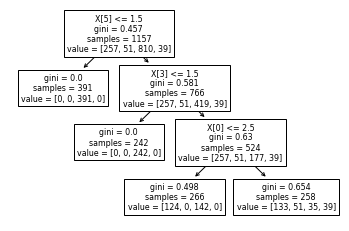

In [32]:
y_train_p = clf_gini.predict(x_train)

In [33]:
pd.value_counts(y_train_p)

unacc    899
acc      258
dtype: int64

In [34]:
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_en.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [35]:
y_pred = clf_en.predict(x_test)
print("The accuracy is {0:.4f}".format(accuracy_score(y_test,y_pred)))

The accuracy is 0.8053


[Text(111.60000000000001, 190.26, 'X[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

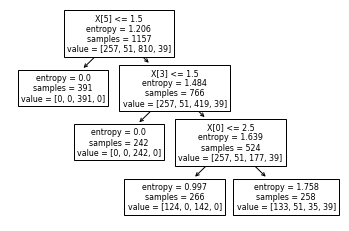

In [36]:
tree.plot_tree(clf_en.fit(x_train,y_train))